In [5]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import scipy
import matplotlib.pyplot
import matplotlib.gridspec as gridspec
from matplotlib import rcParams, cm
from pyne import serpent
from pyne import nucname
#rcParams['font.family'] = 'Times New Roman'
#rcParams['font.size'] = 14
#det0 = serpent.parse_det('../serpent/core_det0.m')
#det0 = serpent.parse_det('../serpent/bw_breeding/core_det0.m')
det0 = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/safety_parameters/init/both_900K/core_gre7_det0.m')
#det03 = serpent.parse_det('../serpent/core_300K_det0.m')

#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
# Power generation distribution
x_pow = det0['DETpowxyX']
y_pow = det0['DETpowxyY']
pow_den_raw = det0['DETpowxy']
fission_raw = det0['DETfisxy']
breed_raw = det0['DETbreeding']
fluxxy_raw = det0['DETfluxxy']
x = det0['DETflux_radX']
z = det0['DETflux_axialZ']
flux_rad = det0['DETflux_rad']
flux_rad_1 = det0['DETflux_rad1']
flux_rad_2 = det0['DETflux_rad2']
flux_axial = det0['DETflux_axial']
flux_axial_th = det0['DETflux_axial2']
flux_axial_f = det0['DETflux_axial1']

#tot_flux_rad  = np.reshape (flux_rad[:,1],  (len(x),4))
#fast_flux_rad = np.reshape (flux_rad_1[:,1], (len(x),4))
#ther_flux_rad = np.reshape (flux_rad_2[:,1], (len(x),4))
pow_cell_vol = (410-(-410))*(x_pow[1,0]-x_pow[0,0])*(y_pow[1,0]-y_pow[0,0])   # Volume of POW generation mesh cell
pow_den = np.reshape (pow_den_raw[:,10], (len(x_pow), len(y_pow))) # W/(one cell 1cmx1cmx)
#fission_den = 2e+4*np.reshape (fission_raw[:,10], (len(x_pow), len(y_pow))) # Normalize by max value
fission_den = np.reshape (fission_raw[:,10], (len(x_pow), len(y_pow))) # Normalize by max value
fluxxy = np.reshape (fluxxy_raw[:,10], (len(x_pow), len(y_pow))) 
norm_flux = fluxxy / np.max(fluxxy)                                    # Normalize by max value

breed_den_0 = np.reshape (breed_raw[:,10], (len(x_pow), len(y_pow)))   # Normalize by total flux
breed_den = abs(breed_den_0 / fluxxy)

#print x_pow[:,0]
#print pow_cell_vol
#print pow_den
#print tot_flux_rad[:,3]
#print flux_rad_1[:,10]
#print flux_rad[:,11]
#print (breed_den)

/home/andrei2/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in true_divide


In [6]:
det10 = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/safety_parameters/equil/both_900K/core_gre7_det0.m')

eq_flux_rad = det10['DETflux_rad']
eq_flux_rad_1 = det10['DETflux_rad1']
eq_flux_rad_2 = det10['DETflux_rad2']
eq_flux_axial = det10['DETflux_axial']
eq_pow_den_raw = det10['DETpowxy']
eq_fission_raw = det10['DETfisxy']
eq_breed_raw = det10['DETbreeding']
eq_fluxxy_raw = det10['DETfluxxy']
eq_flux_axial = det10['DETflux_axial']
eq_flux_axial_th = det10['DETflux_axial2']
eq_flux_axial_f = det10['DETflux_axial1']

#eq_fission_den = 2e+4*np.reshape (eq_fission_raw[:,10], (len(x_pow), len(y_pow))) # Normalize by max value
eq_pow_den = np.reshape (eq_pow_den_raw[:,10], (len(x_pow), len(y_pow))) # W/(one cell 1cmx1cmx)
eq_fission_den = np.reshape (eq_fission_raw[:,10], (len(x_pow), len(y_pow))) # Normalize by max value
eq_fluxxy = np.reshape (eq_fluxxy_raw[:,10], (len(x_pow), len(y_pow))) 
eq_norm_flux = eq_fluxxy / np.max(eq_fluxxy)                                    # Normalize by max value
eq_breed_den_0 = np.reshape (eq_breed_raw[:,10], (len(x_pow), len(y_pow)))   # Normalize by total flux


<IPython.core.display.Javascript object>


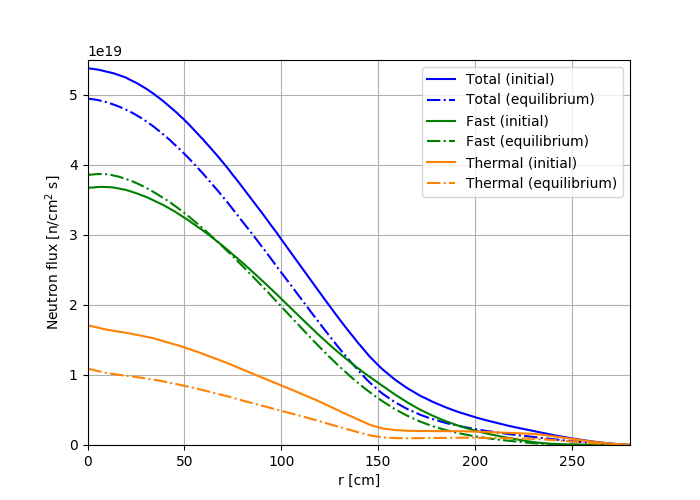

<IPython.core.display.Javascript object>


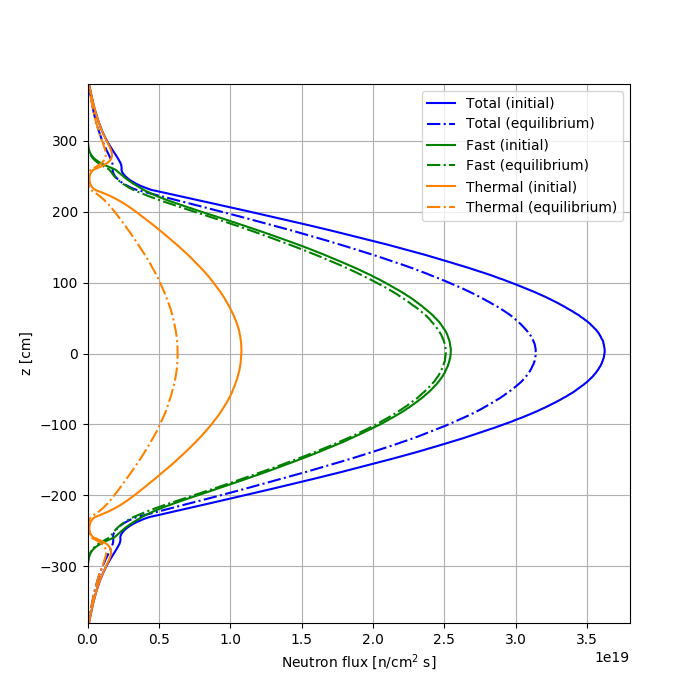

<IPython.core.display.Javascript object>


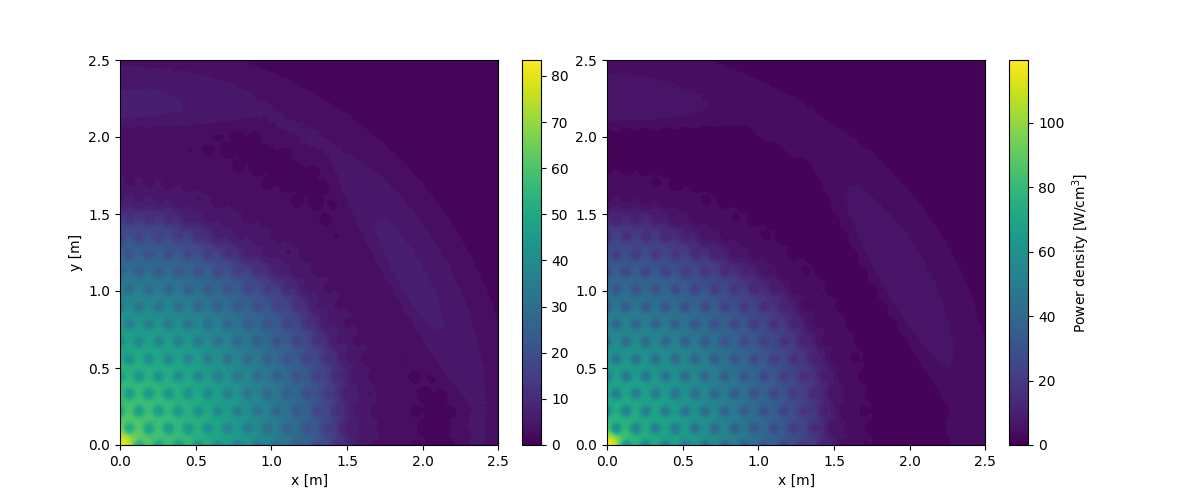

<IPython.core.display.Javascript object>


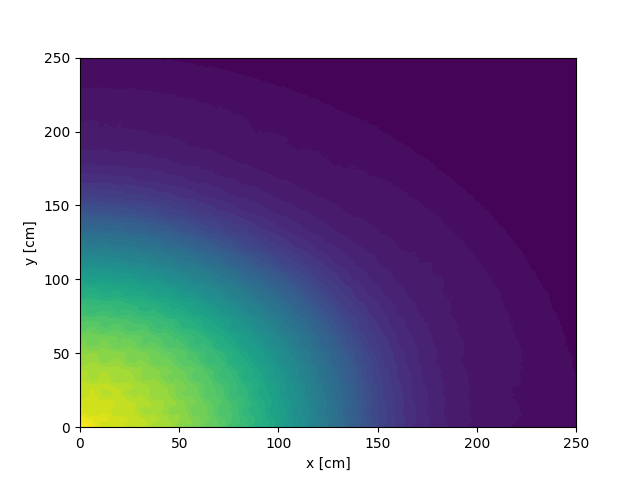

Max power density 72036.9608112
Average power density 507.427059802
Max flux 2.38158e+17
Min flux 0.0
2.38158e+17
2.8385172672e+16
2.37775e+17
2.43406259072e+16
Total power 0.592239/0.641708 GW
Average power density 7.053149 W/cm$^3$
Total fission power 0.593835 GW
Energy per fission 199.462550 MeV


In [7]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax = fig_1.add_subplot(111)
ax.grid(True)
ax.set_ylim(0,5.5e19)
ax.set_xlim(0.0,280.0)
ax.plot(x[:,2], flux_rad[:,10], '-',color='blue',label='Total (initial)')
ax.plot(x[:,2], eq_flux_rad[:,10], '-.',color='blue',label='Total (equilibrium)')
#ax.fill_between(x[:,2], flux_rad[:,10]*(1-flux_rad[:,11]), flux_rad[:,10]*(1+flux_rad[:,11]),alpha=1, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=1)
ax.plot(x[:,2], flux_rad_1[:,10], '-',color='green',label='Fast (initial)')
ax.plot(x[:,2], eq_flux_rad_1[:,10], '-.',color='green',label='Fast (equilibrium)')
ax.plot(x[:,2], flux_rad_2[:,10], '-',color='#ff8100', label='Thermal (initial)')
ax.plot(x[:,2], eq_flux_rad_2[:,10], '-.',color='#ff8100', label='Thermal (equilibrium)')
ax.legend(loc=0)
ax.set_ylabel(r'Neutron flux [n/cm$^2$ s]')
ax.set_xlabel('r [cm]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/radial_flux_init_vs_eq.png',bbox_inches='tight', dpi=1100)
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2, figsize=[7,7])
ax = fig_2.add_subplot(111)
ax.grid(True)
ax.set_xlim(0,3.8e19)
ax.set_ylim(-380.0,380.0)
#ax.semilogx(energy, spectrum_grid[:,10], '-', label='Averaged', color='#ff8100')
ax.plot(flux_axial[:,10],z[:,2], '-',color='blue', label='Total (initial)')
ax.plot(eq_flux_axial[:,10],z[:,2], '-.',color='blue', label='Total (equilibrium)')
ax.plot(flux_axial_f[:,10],z[:,2], '-',color='green', label='Fast (initial)')
ax.plot(eq_flux_axial_f[:,10],z[:,2], '-.',color='green', label='Fast (equilibrium)')
ax.plot(flux_axial_th[:,10],z[:,2], '-',color='#ff8100', label='Thermal (initial)')
ax.plot(eq_flux_axial_th[:,10],z[:,2], '-.',color='#ff8100', label='Thermal (equilibrium)')
#ax.semilogx(energy_grid[:,2], spectrum_grid_II[:,10]/np.trapz(spectrum_grid_II[:,10],energy_grid[:,2]), '-', label='Zone II', color='#ff8100')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
ax.legend(loc=0)
ax.set_xlabel(r'Neutron flux [n/cm$^2$ s]')
ax.set_ylabel('z [cm]')
#ax.set_title(plot_title)
fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/axial_flux.png',bbox_inches='tight', dpi=1100)

# Create heatmap
fig_3 = matplotlib.pyplot.figure(3,figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
#pow_den_plot = (200*1.60218e-13*fission_den)/(pow_cell_vol)
pow_den_plot = (pow_den)/(pow_cell_vol)
ax1 = fig_3.add_subplot(gs[0])
pc = ax1.pcolor((pow_den_plot),cmap=cm.viridis)
ax1.contourf(x_pow[:,0]/100,y_pow[:,0]/100,pow_den_plot,50,cmap=cm.viridis)
cbar = fig_3.colorbar(pc)
#cbar.set_label(r'Power density [W/cm$^3$]')
#cbar.set_label('Change of Normalized power density')
ax1.set_xlabel('x [m]')
ax1.set_xlim(0,2.5)
ax1.set_ylabel('y [m]')
ax1.set_ylim(0,2.5)

eq_pow_den_plot = (eq_pow_den)/(pow_cell_vol)
ax2 = fig_3.add_subplot(gs[1])
pc = ax2.pcolor((eq_pow_den_plot),cmap=cm.viridis)
ax2.contourf(x_pow[:,0]/100,y_pow[:,0]/100,eq_pow_den_plot,50,cmap=cm.viridis)
cbar = fig_3.colorbar(pc)
cbar.set_label(r'Power density [W/cm$^3$]')
ax2.set_xlabel('x [m]')
ax2.set_xlim(0,2.5)
#ax2.set_ylabel('y [cm]')
ax2.set_ylim(0,2.5)
fig_3.subplots_adjust(left=0.1, wspace=0.03)
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/power_density.png',bbox_inches='tight', dpi=1100)

# Create heatmap
fig_4 = matplotlib.pyplot.figure(4)
#fig_3.set_size_inches(15, 10, forward=True)
ax = fig_4.add_subplot(111)
pc = ax.pcolor((fluxxy),cmap=cm.viridis)
#pc = ax.pcolor((eq_fluxxy-fluxxy),cmap=cm.viridis)
#ax.grid(True)
#ax.imshow(pow_den, cmap='coolwarm', interpolation='nearest')
#ax.contourf(x_pow[:,0],y_pow[:,0],pow_den,100,cmap=cm.jet)
ax.contourf(x_pow[:,0],y_pow[:,0],fluxxy,50,cmap=cm.viridis)
#ax.contourf(x_pow[:,0],y_pow[:,0],(eq_fluxxy-fluxxy),50,cmap=cm.viridis)
#cbar = fig_4.colorbar(pc)
#cbar.set_label(r'Neutron flux distribution [n/cm$^2$ s]')
#cbar.set_label(r'Change of Normalized neutron flux')
ax.set_xlabel('x [cm]')
ax.set_xlim(0,250)
ax.set_ylabel('y [cm]')
ax.set_ylim(0,250)
fig_4.show()
#fig_4.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/flux_2d.png',bbox_inches='tight', dpi=1100)

#matplotlib.pyplot.show()
#matplotlib.pyplot.close()
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/breeding_distribution_init.png',bbox_inches='tight', dpi=700)

print ('Max power density ' + str(210 * 1.60218e-13*np.amax(fission_raw)))
print ('Average power density ' + str(210 * 1.60218e-13*np.average(fission_raw)))
print ('Max flux ' + str(np.amax(fluxxy_raw)))
print ('Min flux ' + str(np.amin(fluxxy_raw)))
#print(breed_den_0)
print(np.amax(fluxxy))
print(np.average(fluxxy))

print(np.amax(eq_fluxxy))
print(np.average(eq_fluxxy))

#print (eq_fission_den - fission_den)
#print ((eq_fluxxy-fluxxy)/fluxxy)
#print(pow_den)
print('Total power %f/%f GW' % (1e-9*np.sum(pow_den), 1e-9*np.sum(eq_pow_den)))
print(r'Average power density %f W/cm$^3$' % (np.average(pow_den)/pow_cell_vol))
print('Total fission power %f GW' % (1e-9 * 200 * 1.60218e-13*np.sum(fission_den)))
print('Energy per fission %f MeV' % (np.sum(pow_den)/(1.60218e-13*np.sum(fission_den))))

In [ ]:
import math
norm_flux = fluxxy / np.max(fluxxy)
norm_breed = breed_den_0 / np.max(breed_den_0)

          
fig_6 = matplotlib.pyplot.figure(6)
ax = fig_6.add_subplot(111)
pc = ax.pcolor((norm_breed),cmap=cm.viridis)
ax.set_xlim(0,250) 
ax.set_ylim(0,250) 
ax.set_label('x [cm]')
ax.set_label('y [cm]')
ax.contourf(x_pow[:,0],y_pow[:,0], norm_breed ,50, cmap=cm.viridis)
cbar = fig_6.colorbar(pc)
cbar.set_label(r'Normalized caption reaction rate for $^{232}$Th')
fig_6.show()
#fig_6.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/breeding_dist.png',bbox_inches='tight', dpi=1100)

fig_7 = matplotlib.pyplot.figure(7)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.title(r'Normalized neutron flux')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], norm_flux,50, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

In [ ]:
abs_change = eq_fluxxy-fluxxy
abs_powden_d = eq_pow_den - pow_den

print(np.average(eq_pow_den/pow_cell_vol))
print(np.average(pow_den/pow_cell_vol))
print(100*(np.amax(eq_pow_den/pow_cell_vol)-np.amax(pow_den/pow_cell_vol))/np.amax(pow_den/pow_cell_vol))

rel_flux_d = abs_change
rel_pow_d = abs_powden_d

#for i in range(len(rel_flux_d)):
#    for j in range(len(rel_flux_d)):
#        if rel_flux_d[i,j] > 1.0 and rel_flux_d[i,j] != np.inf: 
#           print (rel_flux_d[i,j])

fig_8 = matplotlib.pyplot.figure(8)
ax = fig_8.add_subplot(111)
pc = ax.pcolor((rel_flux_d),cmap=cm.viridis)
ax.set_xlim(0,250) 
ax.set_ylim(0,250) 
ax.set_label('x [cm]')
ax.set_label('y [cm]')
#ax.set_title(r'Neutron flux change')
ax.contourf(x_pow[:,0],y_pow[:,0], rel_flux_d ,50, cmap=cm.viridis)
cbar = fig_8.colorbar(pc)
cbar.set_label(r'Neutron flux change after changing composition [%]')
fig_8.show()
#fig_8.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

fig_9 = matplotlib.pyplot.figure(9)
ax = fig_9.add_subplot(111)
pc = ax.pcolor((rel_pow_d),cmap=cm.viridis)
ax.set_xlim(0,250) 
ax.set_ylim(0,250) 
ax.set_label('x [cm]')
ax.set_label('y [cm]')
#ax.set_title(r'Neutron flux change')
ax.contourf(x_pow[:,0],y_pow[:,0], rel_pow_d,50, cmap=cm.viridis)
cbar = fig_9.colorbar(pc)
cbar.set_label(r'Power density change after changing composition [%]')
fig_9.show()
#fig_9.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

In [ ]:
q =  norm_breed / norm_flux
#for i in range(np.shape(q)[0]):
#    for j in range(np.shape(q)[1]):
#        if q[i,j] > 1.15:
#            q[i,j] = np.nan
          
fig_10 = matplotlib.pyplot.figure(9)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], q, 20, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()


In [ ]:
# Calculate total fission power in Zone I and Zone II
zoneI_flux = det0['DET1']
zoneI_flux_eq = det10['DET1']
zoneII_flux = det0['DET2']
zoneII_flux_eq = det10['DET2']

zoneI = np.mean(zoneI_flux[:,10])
zoneI_eq = np.mean(zoneI_flux_eq[:,10])
zoneI_uncrt = 100*np.mean(zoneI_flux[:,11])
zoneI_uncrt_eq = 100*np.mean(zoneI_flux_eq[:,11])
zoneII = np.mean(zoneII_flux[:,10])
zoneII_eq = np.mean(zoneII_flux_eq[:,10])
zoneII_uncrt = 100*np.mean(zoneII_flux[:,11])
zoneII_uncrt_eq = 100*np.mean(zoneII_flux_eq[:,11])
print (r'Zone I total power %E +- %f %%' %(zoneI, zoneI_uncrt) )
print (r'Zone II total power %E +- %f %%' %(zoneII, zoneII_uncrt) )
print('Equilibrium')
print (r'Zone I total power %E +- %f %%' %(zoneI_eq, zoneI_uncrt_eq) )
print (r'Zone II total power %E +- %f %%' %(zoneII_eq, zoneII_uncrt_eq) )
print ('\nInitial total flux %E +- %f %%' %((zoneI+zoneI),(zoneI_uncrt+zoneII_uncrt)/2) )
print (r'Equilbrium total flux %E +- %f %%' %((zoneI_eq+zoneI_eq),(zoneI_uncrt_eq+zoneII_uncrt_eq)/2) )
print ('\nTable. Power generation fraction in each zone for initial and equilibrium state.')
print ('___________Initial_______________________Equlibrium')
print (r'Zone I    %f +- %f %%           %f +- %f %%' %(100*zoneI/(zoneI+zoneII),zoneI_uncrt, 100*zoneI_eq/(zoneI_eq+zoneII_eq), zoneI_uncrt_eq)) 
print (r'Zone II   %f +- %f %%           %f +- %f %%' %( 100*zoneII/(zoneI+zoneII), zoneII_uncrt, 100*zoneII_eq/(zoneI_eq+zoneII_eq), zoneII_uncrt_eq) )
